## Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset 

In [2]:
# to read csv 
dataset = pd.read_csv('medical insurance dataset.csv')

In [3]:
dataset 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.sex.unique()

array(['female', 'male'], dtype=object)

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Split Input and Output Columns

In [6]:
# Result of X is 2D Array
X = dataset.iloc[:,:-1].values

# result of y is 1D Array
y = dataset.iloc[:,-1].values

In [7]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [8]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Missing Value Handling 

In [9]:
# to handle Missing Value, Use for numeric value 
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=2)

In [10]:
impute.fit(X[:,:1])

SimpleImputer(verbose=2)

In [11]:
# this will transform handle missing value and 
X[:,:1] = impute.transform(X[:,:1])

In [12]:
X # same way we can do for all columns and ths process is generally performed after split operation n

array([[19.0, 'female', 27.9, 0, 'yes', 'southwest'],
       [18.0, 'male', 33.77, 1, 'no', 'southeast'],
       [28.0, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18.0, 'female', 36.85, 0, 'no', 'southeast'],
       [21.0, 'female', 25.8, 0, 'no', 'southwest'],
       [61.0, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [13]:
# handle missing values for chategorical values 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough',n_jobs=-1)
X = ct.fit_transform(X)

In [14]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,1.0,0.0,19.0,27.9,0,yes,southwest
1,0.0,1.0,18.0,33.77,1,no,southeast
2,0.0,1.0,28.0,33.0,3,no,southeast
3,0.0,1.0,33.0,22.705,0,no,northwest
4,0.0,1.0,32.0,28.88,0,no,northwest
...,...,...,...,...,...,...,...
1333,0.0,1.0,50.0,30.97,3,no,northwest
1334,1.0,0.0,18.0,31.92,0,no,northeast
1335,1.0,0.0,18.0,36.85,0,no,southeast
1336,1.0,0.0,21.0,25.8,0,no,southwest


In [15]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5])],remainder='passthrough',n_jobs=-1)
X = ct.fit_transform(X)

In [16]:
X

array([[0.0, 1.0, 1.0, ..., 27.9, 0, 'southwest'],
       [1.0, 0.0, 0.0, ..., 33.77, 1, 'southeast'],
       [1.0, 0.0, 0.0, ..., 33.0, 3, 'southeast'],
       ...,
       [1.0, 0.0, 1.0, ..., 36.85, 0, 'southeast'],
       [1.0, 0.0, 1.0, ..., 25.8, 0, 'southwest'],
       [0.0, 1.0, 1.0, ..., 29.07, 0, 'northwest']], dtype=object)

In [31]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[7])],remainder='passthrough',n_jobs=-1)
X = ct.fit_transform(X)

In [32]:
new_df = pd.DataFrame(X).values

In [33]:
new_df

array([[1.0, 0.0, 0.0, ..., 19.0, 27.9, 0],
       [0.0, 1.0, 0.0, ..., 18.0, 33.77, 1],
       [0.0, 1.0, 0.0, ..., 28.0, 33.0, 3],
       ...,
       [1.0, 0.0, 0.0, ..., 18.0, 36.85, 0],
       [1.0, 0.0, 0.0, ..., 21.0, 25.8, 0],
       [1.0, 0.0, 0.0, ..., 61.0, 29.07, 0]], dtype=object)

## Split Dataset into Train and Test

In [34]:
# after missing value handling we to avoid data leakage problem we perform first split operation 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(new_df,y,test_size=0.2,random_state=18)

## Apply Scalling If Required

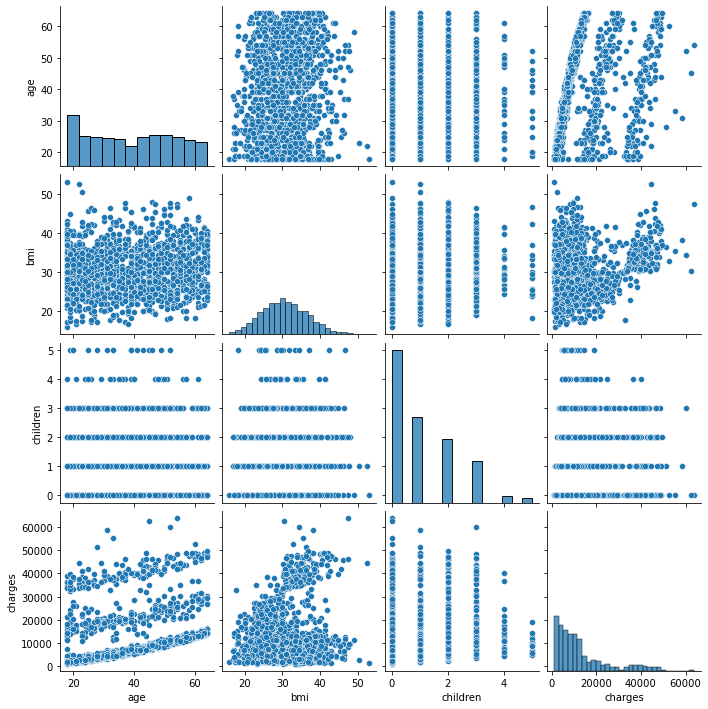

In [35]:
# now we will apply scaling :- two type standard Scaling and Min Max Scaler 
# standard scaling  = (Xi-Xmean)/std(X) values transfer from -3 to 3
# Min Max Scaler = Xi-Xmin/Xmax-Xmin values transfer from 0 to 1
# when should we use min max  :- when we observ that most of column data plot bell or normal distribotion curve 
# standard_scaling will help all the time so that mostly std_scalling is used 

# https://www.c-sharpcorner.com/article/what-is-data-visualization-in-machine-learning-and-how-does-it-work/

sns.pairplot(dataset) # here we can say that when we plot graph and see most of feature should build normal distribution or not if not 
# then use std_scaler and if yes then min max scaller

# in below case only BMI to BMI plots normal distribution like graph and other feature dont have plot normal distribution so 
# use std_scalar

## Add Model For Training

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_train_pred = lr.predict(X_train)

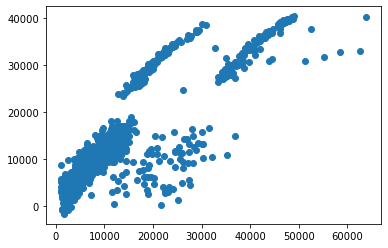

In [25]:
# plot scaller plot
plt.scatter(y_train,y_train_pred)

In [26]:
y_yest_pred = lr.predict(X_test)

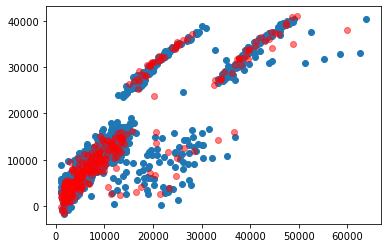

In [27]:
plt.scatter(y_train,y_train_pred)
plt.scatter(y_test,y_yest_pred,alpha=0.5,color='red')

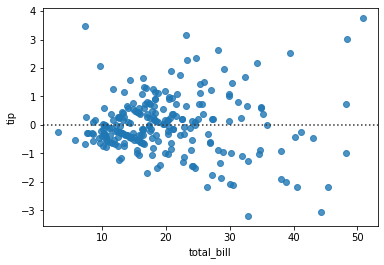

In [50]:
# varience distribution we can see using residual plot 
# if residuals evanly vary around mean then model is appropreate here mean = 0
# if residual makes plot like curve or not evenly distribute around mean then model is not appropreate 

import seaborn as sns
import matplotlib.pyplot as plt
  
# loading dataset
data = sns.load_dataset("tips")
  
# draw residplot
sns.residplot(x = "total_bill",
              y = "tip",
              data = data)
  
# show the plot
plt.show()

# from below graph we can say that model is not appropreate 

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

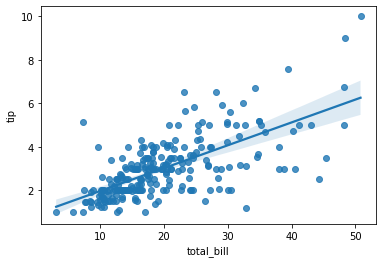

In [58]:
# regression plot :- it gives relation between variables and also say which direction : here positive direction
# has relation and regline shows predict result of model 
sns.regplot(x = data['total_bill'],y=data['tip'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

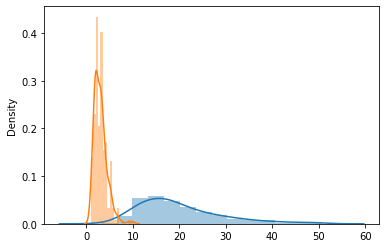

In [62]:
sns.distplot(x=data['total_bill'])
sns.distplot(x = data['tip'])

In [ ]:
from sklearn.metrics import r2_scorea
acc = r2_score(y_test,y_yest_pred)

In [ ]:
acc

In [ ]:
Polynomial Regression :- 

    when Linear model is not bestfit model then there is another type of regression is polynomial regression 
    we transform data into polynomial means we transfer data into number of order like 2nd order , 3rd order ans so on.
    then we apply Linear regression to fit params
    
    special case of Linear regression usefull for derive curvilinear relationships it means set the square or higher order 
    of variables or predictors in model transforming data 
    
Evaluation of Regression 

1) MSE  =  (y - y^)^2/number of samples
2) R2 score : also called coefficient of determination , it means how model fit data if value near to 1 model is batter to make
    prediction near to 0 means model couldnt able to under stand pattern or fit properly 
    --> how much percentage of variation of target variable explained by model
    --> how well line fits into model 
    
    --> acceptable r2 value should be atleast 0.01
    
    


In [ ]:
Linear Regression
1) what is dummy variable trap ?
--> computer doesnot understand words we have to convert it to numerical formate if we have categorical feature and which is 
called dummy variable if we use all dummy column for training model then it will lead to multi-colinearity called dummy 
variable trap so need to remove one dummy column because this columns are highly corelated to each other 
--> we can check correalation by using pearson correalation , spearman corelation , by plotting graph 
also we can use PCA for dimensionality reduction ,VIF(Varience inflation factor)>5 means high corelation 

2) what is multi colinearity?
--> multi colinearity is nothing but it says how two independent feature corelates with each other is called same above
can check multi co-linearity 

3) process of remove multi-colinearity 
--> using pearson correalation , spearman corelation , by plotting graph 
also we can use PCA for dimensionality reduction ,VIF(Varience inflation factor)>5 means high corelation 

4)why we perform feature scalling ?
--> because it can be possible to have larger value and very smaller value in feature when we perform training operation at that
time this smaller value will dominated by larger value and model disregards small values and because of that model does not 
learn feature properly and gives high varience at time of prediction so we should use feature scaling so that models learn better
way.
--> we can do feature scaling using standard scaling technique using this values ranges between [-3,3] and
    min max scalar technique using this values range between [0,1]
--> standard scalling = (Xi - Xmean)/standard deviation , we can use this all the time it produces good result 
process is feature wise 
--> min-max scaller = (Xi - Xmin)/(Xmax-Xmin) , we can use this when feature produces bell curve when we plot graph 
process is feature wise 
--> standard deviation = average diff of each value from its mean
process is feature wise 

5) Regularization ?
--> focus how to minimize Error(Cost function) if some how we have control on coefficient(m) and intercept(c) and this can 
be achieve by minimizing Error term which is cost function (sum((y-y^)2)) 
--> m(new) = m(old) - (eta) defferential of Error(cost) :- this ths equation of adjusting value of m so that we can lead to global
    minima value (less error)
    
lasso(L1) = loss(cost) + alpha * (coefficient m) : alpha is hyperparama and m is coeficient or slop. 
    we can see when importance of feature is very less then m value will be verry small and this can be nearer to zero so 
    lasso focus on those feature, which importance is high , so that here our error term will be minimum value as compare to 
    ridge 
    
ridge(L2) = loss(cost) + alpha * (coefficient m)**2 : here ridge what is does it is squaring the m value so means that which feature 
        will have very low m value , this regularization tech add panelty on that so that error will be high because this try to
        understand those feature which is not impact on dependent feature as well and because of that this does mistake 
        and increase error some how 
        
--> so losso regularization is better compare to ridge 

ElasticNet : cost + alpha * m + beta * m**2 : alpha and beta is hyperparameter and m is slop or coefficient 
        
        

In [ ]:
what is structure data and unstructure data ?
--> structure data is like tabular data as example of data available in excel data available there is row and column formate
and unstructure data is available in form of audio, video, text data,data come from web that we have to don in structure formate so that we can
do further process using some of algorithm then analyse it.